Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Imports

In [1]:
# numpy
import numpy as np

In [2]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt
from IPython.display import Image

In [3]:
%matplotlib inline

In [4]:
# sympy
import sympy as sy
sy.init_printing(use_unicode = True)

Bibliographie:

Voir,

* Landau & Lifshitz "Mécanique"
* Goldstein "Classical Mechanics"
* https://mathworld.wolfram.com/EulerAngles.html

# Matrices de changement de coordonnées

On définie un repère *fixe* de base $(\bm e_X,\bm e_Y,\bm e_Z)$ et un repère *mobile* de base $(\bm e_x,\bm e_y,\bm e_z)$.

Un vecteur est représenté par la matrice colonne de ses coordonnés:
$$
\bm r = \begin{pmatrix} \bm e_X & \bm e_Y & \bm e_Z \end{pmatrix} \begin{pmatrix} X \\ Y \\ Z \end{pmatrix} = X \bm e_X + Y \bm e_Y + Z \bm e_Z = \begin{pmatrix} X \\ Y \\ Z \end{pmatrix},
$$
la dernière égalité est valable si $(\bm e_X,\bm e_Y,\bm e_Z)$ est la base *canonique*, puisque la matrice dont les colonnes sont les vecteurs de la base canonique est la matrice identité $I_3$. Ici $(X,Y,Z)$ sont les coordonnées du vecteur $\bm r$. Notez que les vecteurs de la base agissent à *gauche* des vecteurs colonne.

Généralement on choisit la base canonique pour chaque diférent repère: le *changement de base* consiste donc à représenter la matrice identité dans un autre repère, formellement:
$$
I_3 \rightarrow \left. \begin{pmatrix} \bm e_X & \bm e_Y & \bm e_Z \end{pmatrix} \right|_{(\bm e_x,\bm e_y,\bm e_z)}
$$

On change maintenant la base fixe par la base mobile par une rotation d'axe $\bm n$ et d'angle $a$:
$$
(\bm e_X,\bm e_Y,\bm e_Z) \xrightarrow{R_{\bm n}(a)} (\bm e_x,\bm e_y,\bm e_z)
$$
Cette transformation peut simplement s'écrire en forme matricielle:
$$
\begin{pmatrix} \bm e_x & \bm e_y & \bm e_z \end{pmatrix}= \begin{pmatrix} \bm e_X & \bm e_Y & \bm e_Z \end{pmatrix} R_{\bm n}(a) = R_{\bm n}(a),
$$
Puisque $\big(\bm e_X \; \bm e_Y \; \bm e_Z\big)$ est la matrice identité. Cette équation dit simplement que le *colonnes* de $R_{\bm n}(a)$ sont les vecteurs d'une base orthonormale du repère tourné (mobile) par rapport au repère initial (fixe).

Dans la nouvelle base le vecteur s'écrit:
$$
\bm r = \begin{pmatrix} \bm e_x & \bm e_y & \bm e_z \end{pmatrix} \begin{pmatrix} x \\ y \\ z \end{pmatrix}.
$$
Le point important à noter c'est que le vecteur $\bm r$ est toujours le *même*, quelque soit le système de coordonnées qu'on utilise pour le représenter. 
La matrice $R$ qui transforme par rotation, un repère (vieux, fixe, etc.) dans un autre (nouveau, mobile, etc.) s'appelle la *matrice de passage*; elles sont la transposée l'une de l'autre.

En remplaçant dans
$$
\bm r = \begin{pmatrix} \bm e_x & \bm e_y & \bm e_z \end{pmatrix}\begin{pmatrix} x \\ y \\ z\end{pmatrix}
$$
les vecteurs de la base mobile par leur expression comme rotation de la base fixe 
$$
\bm r = R_{\bm n}(a) \begin{pmatrix} x \\ y \\ z \end{pmatrix}.
$$
on arrive à la formule de changement de coordonnées d'un vecteur,
$$
\begin{pmatrix} x \\ y \\ z \end{pmatrix} = C_{\bm n}(a) \begin{pmatrix} X \\ Y \\ Z \end{pmatrix}, \quad C_{\bm n}(a) = R_{\bm n}(a)^T,
$$
où on a introduit la notation $C=R^T$ pour la transposée de la matrice de rotation, qu'on peut appeller matrice de changement de coordonnées, ou matrice de rotations du repère mobile.

Les matrices de changement de coordonnées associées aux rotations autour des axes $X$, $Y$ et $Z$ (canoniques) sont:
$$
\begin{align*} C_X(\phi) &= \begin{pmatrix} 1 & 0 & 0 \\ 0 & \cos \phi & \sin \phi \\ 0 & -\sin \phi & \cos \phi \end{pmatrix}\\
C_Y(\phi) &= \begin{pmatrix} \cos \phi & 0 & -\sin \phi \\ 0 & 1 & 0 \\ \sin \phi & 1 & \cos \phi\end{pmatrix}\\
C_Z(\phi) &= \begin{pmatrix} \cos \phi & \sin \phi & 0 \\ -\sin \phi & \cos \phi & 0 \\ 0 & 0 & 1 \end{pmatrix}
\end{align*}
$$
respectivement.

## Changement de coordonnées d'une matrice

On a vu qu'un vecteur dont les coordonnées de départ sont $(X,Y,Z)$ (fixe), s'expirme, en coordonnées $(x,y,z)$ du repère d'arrivé (mobile), par la formule de changement de coordonnées:
$$
\begin{pmatrix} x \\ y \\ z \end{pmatrix} = C_{\bm n}(a) \begin{pmatrix} X \\ Y \\ Z \end{pmatrix},
$$
où $R=C^T$ est la matrice de passage: elle fait une rotation du repere fixe d'un angle $a$ autour de l'axe $\bm n$. 

De même on peut faire un changement de coordonnées d'une matrice $A$ définie dans le repère fixe, en matrice du repère mobile $\bar{A}$ par la transformation de similitude, à l'aide de la matrice $R$ de passage de la base fixe à la base mobile:
$$
\bar{A} = R^T_{\bm n}(a) A R_{\bm n}(a),
$$
qu'on peut aussi écrire,
$$
\bar{A} = C_{\bm n}(a) A R_{\bm n}(a).
$$
La transformation inverse est:
$$
A = R_{\bm n}(a) \bar{A} R^T_{\bm n}(a).
$$

L'expression $CAR$, s'obtient directement en notant la matrice $A$ dans la base fixe $\bm e = (\bm e_X\, \bm e_Y\, \bm e_Z)$, par $\bm e A \bm e^T$ (notez l'analogie avec un vecteur):
$$
\bm e A \bm e^T = (\bm e R) (C A R ) (C \bm e^T) = \bar{\bm e} \bar{A} \bar{\bm e}^T,
$$
se qui exprime le fait que l'application $A$ (comme objet géométrique) est la même dans les deux bases, seulement son expression matricielle change.

### Transformation des produits scalaire et vectoriel

Le produit scalaire is invariant par rotation $R$ (c'est justement la définition de rotation: elle preserve les longueurs):
$$
\bm X \cdot \bm X = \bm X^T \bm X = (\bm X^T R^T) \cdot (R \bm X) = \bm x \cdot \bm x
$$
avec $\bm X = (X,Y,Z)$, $\bm x = (x,x,z)$, et $\bm x = R \bm X$. (Remarquez que pour deux vecteurs différents on aurait la même démonstration.)

Le produit vectoriel $\bm w = \bm u \wedge \bm v$, de deux vecteurs $\bm u$ et $\bm v$, satisfait la transformation
$$
R \bm w = R \bm u \wedge R \bm v.
$$
Comme c'est facile a voir si on écrit le produit vectoriel comme une application antisymétrique $\bm L \cdot \bm u \ldots = \bm u \wedge \ldots$:
$$
R \bm w = R(\bm L\cdot u)R^T R \bm v.
$$

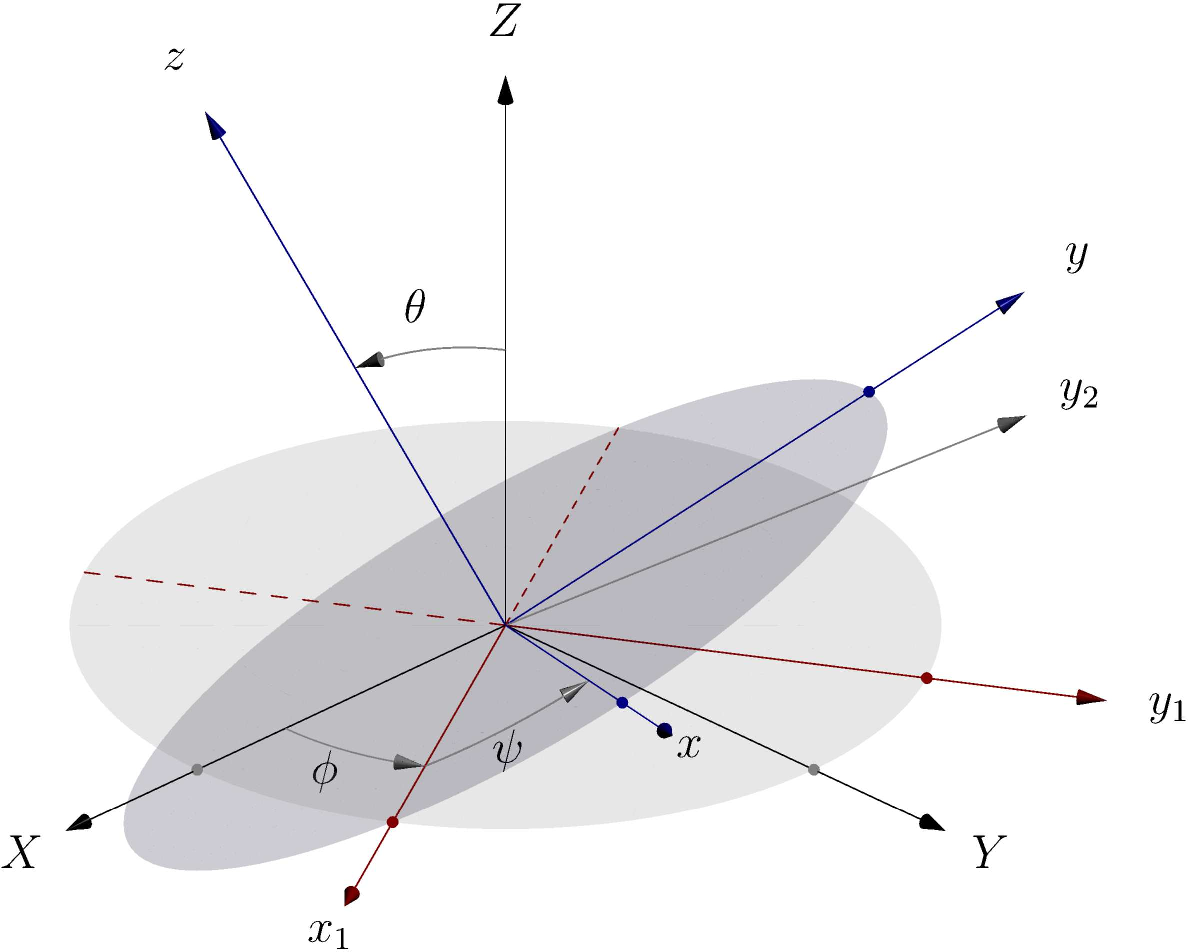

In [5]:
Image(filename='euler.png', width=500)

# Angles d'Euler $(\phi,\theta,\psi)$

Les angles d'Euler

* $\phi$, l'angle de précession
* $\theta$, l'angle de nutation
* et $\psi$, l'angle de rotation (propre)

décrivent le passage du repère fixe $(\bm e_X,\bm e_Y,\bm e_Z)$ au repère mobile $(\bm e_x,\bm e_y,\bm e_z)$: $\phi$ est une rotation autour de l'axe $\bm e_Z$ du repère fixe; $\theta$ est un rotation autour de la ligne nodale $\bm N$; enfin, $\psi$ est une rotation autour de l'axe $e_z$ mobile (ou fixé au solide). Dans la littérature de mécanique vous allez parfois trouver l'échange de $\psi$ et $\phi$, dans la notation des angles.

La transformation du repère fixe $XYZ$ au repère mobile $xyz$, décrites par ces trois angles, s'obtient par une série de trois rotations. 

1. Initialement les deux repères coïncident $XYZ=xyz$, et on fait une rotation de $\phi$ autour de $z$; ceci résulte en une rotation du repère mobile par rapport au fixe:
   $$
   ^B\bm r = \begin{pmatrix} x \\ y \\ z \end{pmatrix}  = C_z(\phi) \begin{pmatrix} X \\ Y \\ Z \end{pmatrix} =  C_z(\phi) ^O \bm r
   $$
   la matrice de rotation (changement de coordonnées) permet d'exprimet un point $^B\bm r$ du solide dans le repère mobile à partir de coordonnées $^O\bm r$ du *même* point dans le repère fixe.
2. Ensuite on tourne encore le repère mobile autour de son axe $x$, d'un angle $\theta$, ce qui transforme les coordonées du point comme
   $$
   \begin{pmatrix} x \\ y \\ z \end{pmatrix}  = C_x(\theta) C_z(\phi) \begin{pmatrix} X \\ Y \\ Z \end{pmatrix} 
   $$
3. Enfin, on fait une rotation de $xyz$ autour de $z$ et d'angle $\psi$:
   $$
   \begin{pmatrix} x \\ y \\ z \end{pmatrix}  = C_z(\psi) C_x(\theta) C_z(\phi) \begin{pmatrix} X \\ Y \\ Z \end{pmatrix}
   $$

On obtient donc la matrice de changement de coordonées, qui peremet expimer les grandeurs associées au corps au repère mobile:
$$
C(\phi, \theta, \psi) = \begin{pmatrix}- \cos\theta  \sin\psi \sin\phi + \cos\psi \cos\phi &  \cos\theta \cos\psi \sin\phi + \sin\psi \cos\phi & \sin\theta \sin\phi \\ -\cos\theta \sin\psi \cos\phi - \cos\psi \sin\phi & \cos\theta \cos\psi \cos\phi - \sin\psi \sin\phi & \sin\theta \cos\phi \\  \sin\theta \sin\psi  & - \sin\theta \cos\psi & \cos\theta \end{pmatrix}
$$
Généralement le grandeurs comme la vitesse angulaire, le moment cinétique, les moments d'inertie, etc. sont plus simples dans le repère mobile: $C$ permet donc de les écrire explicitement (en fonction des angles d'Euler).



D'une façon équivalente on peut décrire les angles d'Euler par la matrice de passage, aussi comme une composition de trois rotations:
1. On part $(\bm e_X,\bm e_Y,\bm e_Z)$, et on fait une rotation d'angle $\phi$ autour de $Z$ pour obtenir le repère $(\bm N,\bm e_{y'},\bm e_Z)$ ($N$ et $y'$ sont les images de $X$ et $Y$)

2. On fait une rotation de $\theta$ autour de $\bm e_N$ (la ligne nodale), on obtient un nouveau repère $(\bm e_N,\bm e_{y''},\bm e_z)$

3. Enfin, on obtient le repère mobile $(\bm e_x,\bm e_y,\bm e_z)$, après une rotation d'angle $\psi$ autour de $\bm e_z$

La matrice de passage (rotations du repère fixe) est l'inverse de celle de changement de coordonnées (rotations du repère mobile):
$$
R(\phi,\theta,\psi) = [C_z(\psi) C_x(\theta) C_z(\phi)]^T = R_Z(\phi) R_X(\theta) R_Z(\psi),
$$
soit
$$
R(\phi, \theta, \psi) = \begin{pmatrix}
\cos\theta  \sin\psi \sin\phi + \cos\psi \cos\phi & -\cos\theta \sin\psi \cos\phi - \cos\psi \sin\phi & \sin\theta \sin\psi \\ \cos\theta \cos\psi \sin\phi + \sin\psi \cos\phi & \cos\theta \cos\psi \cos\phi - \sin\psi \sin\phi & - \sin\theta \cos\psi \\ \sin\theta \sin\phi & \sin\theta \cos\phi & \cos\theta \end{pmatrix}
$$

In [6]:
# matrices de changement de coordonnées

phi, theta, psi = sy.symbols("phi, theta, psi", real=True)

def C_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, s],
                  [0, -s,  c]])
def C_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, -s],
                  [ 0, 1, 0],
                  [s, 0, c]])

def C_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, s, 0],
                  [-s,  c, 0],
                  [0,  0, 1]])

In [7]:
# Matrixe identité
Id = sy.Matrix([[1,  0, 0],
                [0, 1, 0],
                [0, 0, 1]])

# Matrices de rotaion autour des axes X, Y, Z
def R_x(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[1,  0, 0],
                  [0, c, -s],
                  [0, s,  c]])
def R_y(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[ c, 0, s],
                  [ 0, 1, 0],
                  [-s, 0, c]])

def R_z(phi):
    c = sy.cos(phi)
    s = sy.sin(phi)
    return sy.Matrix([[c, -s, 0],
                  [s,  c, 0],
                  [0,  0, 1]])

In [8]:
def MM(x,y,z):
    return sy.Matrix([[x],[y],[z]])

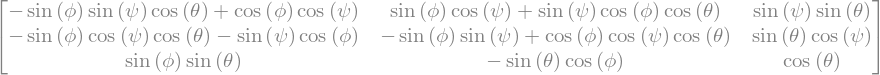

In [9]:
# Changement de base (repère)
C = C_z(psi)*C_x(theta)*C_z(phi)
C

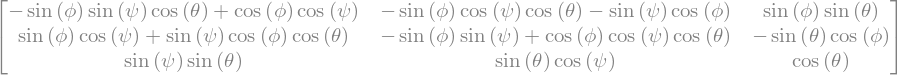

In [10]:
# Rotation: matrice inverse (transposée de C)
R = R_z(phi)*R_x(theta)*R_z(psi)
R

In [28]:
# repère fixe (base canonique)
X = MM(1,0,0) # (1,0,0)
Y = MM(0,1,0) # (0, 1, 0)
Z = MM(0,0,1) # (0, 0, 1)

# rotation de (phi, Z)
x1 = R_z(phi)*X
y1 = R_z(phi)*Y
z1 = R_z(phi)*Z

# rotation de (theta, X)
x2 = R_x(theta)*x1
y2 = R_x(theta)*y1
z2 = R_x(theta)*z1

# rotation de (theta, X)
x = R_z(psi)*x2
y = R_z(psi)*y2
z = R_z(psi)*z2

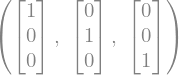

In [29]:
X, Y, Z

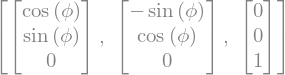

In [30]:
[x1, y1, z1]

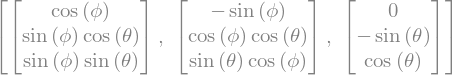

In [31]:
[x2, y2, z2]

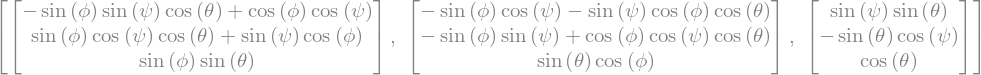

In [33]:
[x, y, z]

# Vitesse de rotation

La vitesse angulaire $\bm \Omega$ s'écrit facilement en utilisant les axes de rotation respectifs:
$$\bm \Omega\big|_{(Z,N,z)} = \dot{\phi} \bm e_Z + \dot{\theta} \bm e_N + \dot{\psi} \bm e_z$$
où nous notons les noms de coordonnées (remarquez que ces axes ne forment pas un repère orthogonal).

Pour avoir son expression explicite dans le repère mobile:
$$\bm \Omega \big|_{(xyz)} =  \dot{\phi} \bm e_Z\big|_{(xyz)} + \dot{\theta} \bm e_N\big|_{(xyz)} + \dot{\psi} \bm e_z \big|_{(xyz)}$$
il suffit de faire les rotations nécessaires pour passer d'un repère à un autre. Le vecteur $\bm e_Z = (0,0,1)$ devient dans la base mobile:
$$\bm e_Z = C(\phi, \theta, \psi) \bm e_z  = C_Z(\psi)C_X(\theta)\bm e_z = \begin{pmatrix}   \sin\theta \sin\psi \\ \sin\theta \cos\phi \\ \cos\theta \end{pmatrix}$$
($Z$ est tranformé par les psi rotations des axes, notez cependant que $C_Z(\psi)$ agit comme l'identité sur l'axe $Z$) et le vecteur $\bm e_N =(1,0,0)$ devient,
$$\bm e_N = C_Z(\psi)C_X(\theta) \bm e_x = C_Z(\psi) \bm e_x = \begin{pmatrix} \cos\psi \\ - \sin\psi \\ 0 \end{pmatrix}$$
(il est transformé lors de l'étape 3 dans la définition des angles d'Euler, la rotation d'axe $X$ agit comme l'identité sur $N$).

En remplaçant dans $\bm \Omega$, on transforme ses "coordonnées" $(Z,N,z)$, en coordonnées du repère mobile:
$$\bm \Omega\big|_{(x,y,z)} = \dot{\phi} C_Z(\psi)C_X(\theta) \bm e_z + \dot{\theta} C_Z(\psi)\bm e_x + \dot{\psi} \bm e_z$$
on obtient finalement l'expression de la vitesse angulaire dans le repère du solide (mobile):
$$\bm \Omega =  \begin{pmatrix} \dot{\phi} \sin \theta \sin \psi + \dot{\theta} \cos\psi \\ \dot{\phi} \sin\theta \cos\psi - \dot{\theta} \sin\psi \\ \dot{\phi}\cos\theta + \dot{\psi} \end{pmatrix}$$


**Remarque** Quand on est sur le repère mobile les vecteurs $(\bm e_x, \bm e_y, \bm e_z)$ forment une base *canonique*; par conséquent la relation de changement de base, inverse de la matrice de passage
$$(\bm e_x\, \bm e_y\, \bm e_z) = (\bm e_X\, \bm e_Y\, \bm e_Z) R, $$
s'écrit (en soulignant qu'on est sur le repère mobile)
$$(\bm e_X\, \bm e_Y\, \bm e_Z) \big|_{(xyz)} = (\bm e_x\, \bm e_y\, \bm e_z) C = C ,$$
on en déduit que les *colonnes* de $C$ sont les vecteurs de la base fixe exprimés dans la base mobile, explicitement:
$$\bm e_X = C \begin{pmatrix}1\\0\\0\end{pmatrix},\; 
\bm e_Y = C \begin{pmatrix}0\\1\\0\end{pmatrix},\; 
\bm e_Z = C \begin{pmatrix}0\\0\\1\end{pmatrix}, $$
c'est-ce qu'on a utilisé pour trouver $\bm \Omega$ dans le repère $(xyz)$.

In [18]:
psi_t, theta_t, phi_t = sy.symbols("psi_t, theta_t, phi_t", real=True)
e_1 = sy.Matrix([1,0,0])
e_2 = sy.Matrix([0,1,0])
e_3 = sy.Matrix([0,0,1])

In [12]:
e_N = C_z(psi)*e_1
e_Z = C_z(psi)*C_x(theta)*e_3

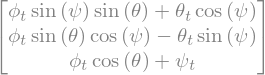

In [13]:
phi_t*e_Z + theta_t*e_N + psi_t*e_3

# Brouillon

In [11]:
print(sy.latex(C))

\left[\begin{matrix}- \sin{\left(\phi \right)} \sin{\left(\psi \right)} \cos{\left(\theta \right)} + \cos{\left(\phi \right)} \cos{\left(\psi \right)} & \sin{\left(\phi \right)} \cos{\left(\psi \right)} \cos{\left(\theta \right)} + \sin{\left(\psi \right)} \cos{\left(\phi \right)} & \sin{\left(\phi \right)} \sin{\left(\theta \right)}\\- \sin{\left(\phi \right)} \cos{\left(\psi \right)} - \sin{\left(\psi \right)} \cos{\left(\phi \right)} \cos{\left(\theta \right)} & - \sin{\left(\phi \right)} \sin{\left(\psi \right)} + \cos{\left(\phi \right)} \cos{\left(\psi \right)} \cos{\left(\theta \right)} & \sin{\left(\theta \right)} \cos{\left(\phi \right)}\\\sin{\left(\psi \right)} \sin{\left(\theta \right)} & - \sin{\left(\theta \right)} \cos{\left(\psi \right)} & \cos{\left(\theta \right)}\end{matrix}\right]


In [32]:
e_1

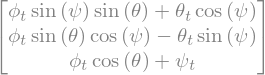

In [22]:
phi_t*R_z(-psi)*R_x(-theta)*Z + theta_t*R_z(-psi)*X + psi_t*Z

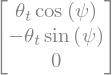

In [21]:
theta_t*R_z(-psi)*X

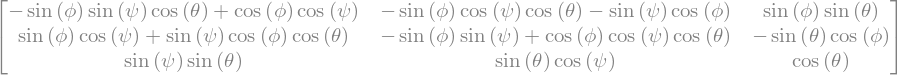

In [35]:
R_z(phi)*R_x(theta)*R_z(psi)

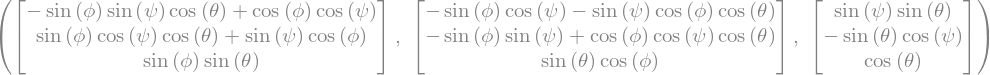

In [37]:
R_z(psi)*R_x(theta)*R_z(phi)*X, R_z(psi)*R_x(theta)*R_z(phi)*Y, R_z(psi)*R_x(theta)*R_z(phi)*Z

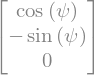

In [34]:
(X.T*R_x(theta)*R_z(psi)).T